# 시작하세요! 텐서플로 2.0 프로그래밍 - 김환희 지음
- https://github.com/wikibook/tf2

# 사용할 모듈

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random as rd

# GPU 쓰는 법
- 런타임 -> 런타임 유형 변경 -> 하드웨어 가속기를 GPU로 설정
- 속도의 비약적 향상
- 여기서 설정해도 다른 파일로 가면 설정이 안 되었을 수 있음
- 만약 딥러닝할 때 너무 느리다면 항상 확인해볼 것
- cf) TPU: 우리의 영역이 아님
- cf) 무료 버전 colab은 gpu 사용시간에 한계가 있음
  - 인터넷에 검색하면 꼼수 알랴줌

#1-3장 텐서플로 2.0(Tensorflow 2.0)

## 즉시 실행 모드 && 세션 대신 함수
- 텐서플로 1.0에서 2.0으로 바뀌며 달라진 점...
- 솔직히 뭔소린지 모르겠음

In [ ]:
# 이해하지 말고, 보기만 하기

@tf.function  # 데코레이터
def add_1_or_10(x, b):
  if b:
    x += 1
  else:
    x += 10
  return x

result = add_1_or_10(tf.constant(1.), True).numpy()
print(result)

2.0


## 난수 생성
- tf.random.uniform(shape, min, max)
  - uniform distribuion: 균일 분포
  - shape: 행렬의 차원
  - min, max: 최소, 최대
- tf.random.normal(shape, avg, sd)
  - normal distribution: 정규 분포
  - shape: 행렬의 차원
  - avg, sd: 평균, 표준편차
  - Xavier, He Initialization에 사용
- 공통적으로 tf.Tensor 객체를 반환

In [ ]:
# 값이 0~1인 1개 짜리 tf.Tensor 객체를 반환
rand = tf.random.uniform([2, 2], 0, 1)
print(rand)
rand = tf.random.normal([2, 2], 0, 1)
print(rand)

tf.Tensor(
[[0.04065073 0.72336257]
 [0.08613503 0.5128697 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.8461302  -2.533415  ]
 [ 0.75904363  0.04105173]], shape=(2, 2), dtype=float32)


## 활성화 함수
- Sigmoid Function
- ReLU Function
- tanh
- cf) 알게 된 사실: tf.Tensor.shape가 (1,)이면 math.exp(tf.Tensor 객체)가 먹힘;;

In [ ]:
# 시그모이드 함수: vanishing 문제
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# ReLU 함수: sigmoid를 개선
def relu(x):
  return max(0, x)

w = tf.random.normal([1], 0, 1)
output = sigmoid(w)
print(output)

for i in range(1000):
  output = sigmoid(i)

0.2923749565688931


## 기본적인 신경망 - 퍼셉트론
- 1단계: a = sum(x * w) + b
- 2단계: output = sigmoid(a) or ReLU(a)
- x는 입력값, w는 가중치(기울기), b는 편향(y절편), output은 최종 출력
- b를 입력=1인 것과 연결된 가중치로도 해석함
- 3단계: output을 바탕으로 손실함수(쉽게 말해 오차)를 구함
- 4단계: 오차를 바탕으로 w, b를 수정
- 5단계: 반복

In [ ]:
# AND 연산 수행하는 간단한 딥러닝 신경망

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]]) # 신경망이 이 값을 출력하도록 w, b를 수정해야 함

w = tf.random.normal([2], 0, 1) # 가중치
b = tf.random.normal([1], 0, 1) # 편향

for i in range(2000):
  error_sum = 0
  for j in range(4):
    # 1 - 2단계 통과
    output = sigmoid(np.sum(x[j] * w) + b)
    # 예상과의 error 계산
    error = y[j][0] - output
    # 경사하강법 비슷하게 학습률(learning rate)과 오차(error)의 곱만큼 가중치, 편향 수정
    w = w + x[j] * 0.01 * error
    b = b + 0.01 * error
    # 에러에 반영
    error_sum += error
  
  if i % 200 == 199:
    print(i, error_sum)

199 -0.4046215451719269
399 -0.2921718115410846
599 -0.24122387630460243
799 -0.2064968742102662
999 -0.1810470051722171
1199 -0.16161745022375826
1399 -0.14626717714736082
1599 -0.1337899600829389
1799 -0.12341034840340889
1999 -0.11461454534328937


## 퍼셉트론의 한계: XOR 게이트
- 퍼셉트론으로는 XOR 게이트도 만들 수 없음!
- 이를 해결하기 위해선 퍼셉트론 여러개를 연결해야 함
---
- 1단계: a = sum(x * w) + b
- 2단계: y = sigmoid(a) or ReLU(a)
- **1, 2단계를 반복함 -> 달라진 점**
- 3단계: y를 바탕으로 손실함수(쉽게 말해 오차)를 구함
- 4단계: 오차를 바탕으로 w, y를 수정
- 5단계: 반복

## Keras 쓰는 법
- tf.keras 내에서 쓸 수 있음:
- **1단계:** Sequential: sequential model(레이어를 일직선으로 배치한 모델) 생성
- layers.Dense: 입출력 사이가 모두 연결된 기본적 레이어
  - unit: 뉴런 개수
  - activation: 활성화 함수
  - input_shape: sqeuential model에서는 첫 번째 레이어에만 정의, 입력 개수
- **2단계:** model.compile: 실제로 동작할 수 있도록 준비
  - optimizer: 매개변수 갱신법
    - tf.[keras.]optimizer.SGD: 확률적 경사하강법
    - cf) Adam: 대표적인 optimizer
      - learning_rate: 학습률(lr)
  - loss: 손실 함수
    - mse: MSE 오차(주로 회귀에서, 상수함수와 함께)
    - cf) cee: CEE 오차(주로 분류에서, softmax func과 함께)

In [ ]:
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

# 모델을 확인하는 매서드
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


- **3단계:** model.fit: 실제 학습을 함
  - x: 입력값
  - y: 기대되는 출력
  - epochs: 에포크, train_data를 평균적으로 몇 회만큼 사용하여 넣는가.
  예를 들어, 500개의 데이터를 통해 3500개 분량만큼 학습시킨 경우 epochs=7임.
  - batch_size: 한 에포크에 학습시키는 데이터 수
  - batch_size 만큼의 데이터를 한 번에 넣음


In [ ]:
# 한 번에 1개씩, 총 4개의 데이터를 각각 2000회 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 1s 4ms/step - loss: 0.2667
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2651
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2635
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2613
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2606
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2598
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2585
Epoch 10/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2582
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2578
Epoch 12/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 13/2000
4/4 [==============================

- model.predict: 네트워크 평가
  - 입력값을 받으면, 모델을 실행

In [ ]:
model.predict([[1, 1]])
# model.predict(x)

1/1 [==============================] - 0s 55ms/step


array([[0.49498257]], dtype=float32)

- model.weights: 가중치들(편향 포함, tf.Variable 객체로 반환)

In [ ]:
for weight in model.weights:
  print(weight.numpy())
print()

[[ 0.11340013  0.3778324 ]
 [-0.37302515 -0.10351409]]
[-0.29007187 -0.275872  ]
[[ 0.05365927]
 [-0.30328047]]
[0.11181615]



- history.history: 학습 과정에서의 변화

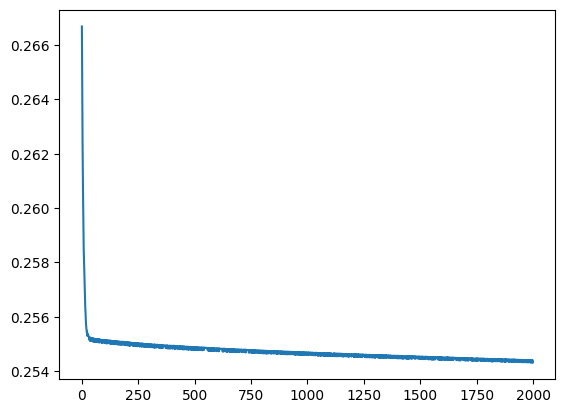

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
print(history.history.keys()) # 일단 loss 밖에 없음

dict_keys(['loss'])


# 4장 회귀(Regression)
- '값'을 추측하는 것
- mse & identity function(항등함수)

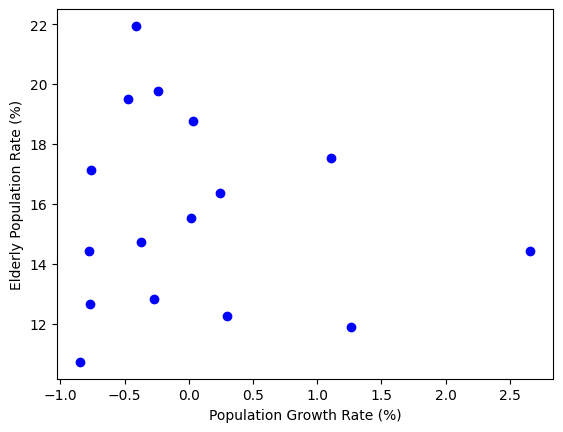

In [ ]:
# 극단치(outlier)를 제거한 인구증가율과 고령인구비율의 관계
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 최소제곱법
- 데이터의 차: 잔차(residual)
- $a = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}$
- $b = \bar{y}-a\bar{x}$
- 추세선(회귀선): $y = ax + b$
- cf) $\bar{x}$: x의 평균
- cf) tf[.keras].optimizer.Adam: Adam을 활용한 매개변수 갱신

기본적인 코딩으로 확인

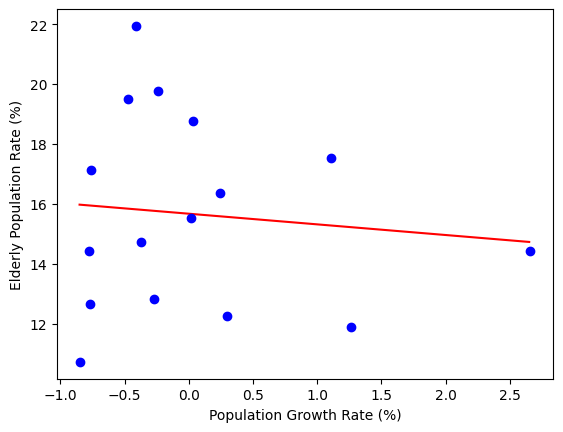

In [ ]:
X = np.array([0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66])
Y = np.array([12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42])

x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

a = sum((X - x_bar) * (Y - y_bar)) / sum((X - x_bar) ** 2)
b = y_bar - a * x_bar

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

텐서플로 딥러닝으로 회귀선 구하기

99 a: 0.1355075240135193 b: 6.419922351837158 loss: 95.1336669921875
199 a: -0.10589320957660675 b: 10.963080406188965 loss: 31.878097534179688
299 a: -0.24898256361484528 b: 13.657275199890137 loss: 13.81972885131836
399 a: -0.317985475063324 b: 14.956615447998047 loss: 10.287569999694824
499 a: -0.34478187561035156 b: 15.461200714111328 loss: 9.824014663696289
599 a: -0.3531835377216339 b: 15.619413375854492 loss: 9.783288955688477
699 a: -0.3553159236907959 b: 15.659557342529297 loss: 9.78089714050293
799 a: -0.3557520806789398 b: 15.667778015136719 loss: 9.780805587768555
899 a: -0.35582393407821655 b: 15.6691255569458 loss: 9.780803680419922
999 a: -0.3558329641819 b: 15.669301986694336 loss: 9.780803680419922


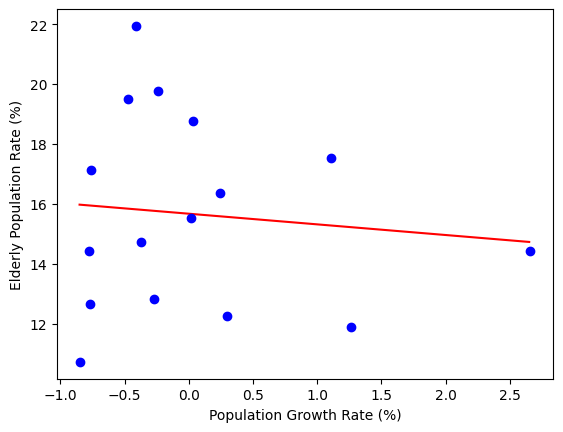

In [ ]:
X = np.array([0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66])
Y = np.array([12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42])

# a, b를 랜덤으로 정하기
a = tf.Variable(rd.random())
b = tf.Variable(rd.random())

# MSE
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a, b])
  if i % 100 == 99:
    print(f'{i} a: {a.numpy()} b: {b.numpy()} loss: {compute_loss().numpy()}')

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 다항 회귀
- $x^2, x^3$과 같은 다항식을 이용한 회귀

99 a: 4.224780082702637 b: -6.119237422943115 c: 6.043823719024658 loss: 73.84760284423828
199 a: 2.9659786224365234 b: -4.850462913513184 c: 9.967144966125488 loss: 34.0767822265625
299 a: 1.398597002029419 b: -2.493328809738159 c: 12.7045316696167 loss: 17.012584686279297
399 a: 0.39541733264923096 b: -0.9754212498664856 c: 14.436869621276855 loss: 11.26695442199707
499 a: -0.1496894806623459 b: -0.1511104702949524 c: 15.380308151245117 loss: 9.794539451599121
599 a: -0.4064052700996399 b: 0.23705117404460907 c: 15.824812889099121 loss: 9.505325317382812
699 a: -0.5115161538124084 b: 0.3959803581237793 c: 16.00682258605957 loss: 9.46165657043457
799 a: -0.5489881038665771 b: 0.45263782143592834 c: 16.07171058654785 loss: 9.456592559814453
899 a: -0.5606141686439514 b: 0.4702165424823761 c: 16.09184455871582 loss: 9.45614242553711
999 a: -0.563737690448761 b: 0.47493863105773926 c: 16.097253799438477 loss: 9.4561128616333


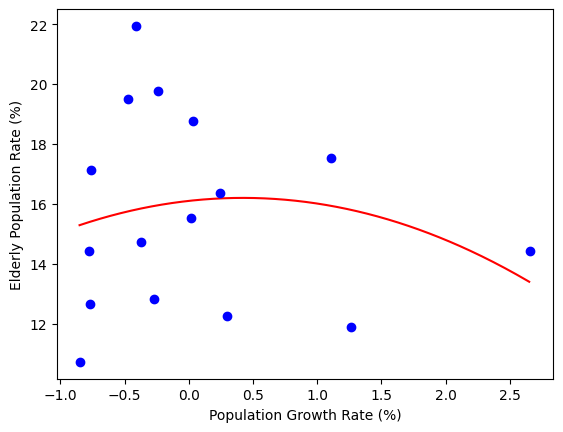

In [ ]:
X = np.array([0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66])
Y = np.array([12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42])

# a, b를 랜덤으로 정하기
a = tf.Variable(rd.random())
b = tf.Variable(rd.random())
c = tf.Variable(rd.random())

# MSE
def compute_loss():
  y_pred = a * X ** 2 + b * X + c # 변화 1
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a, b, c])  # 변화 2
  if i % 100 == 99:
    print(f'{i} a: {a.numpy()} b: {b.numpy()} c: {c.numpy()} loss: {compute_loss().numpy()}') # 변화 3

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x ** 2 + b * line_x + c # 변화 4

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.1195465326309204 b: 5.84447717666626 c: -4.115238666534424 d: 6.246545314788818 loss: 64.82386779785156
199 a: -2.0009384155273438 b: 6.8954901695251465 c: -2.3045895099639893 d: 9.832337379455566 loss: 31.336437225341797
299 a: -1.7209769487380981 b: 5.282278537750244 c: -0.9542152881622314 d: 12.01027774810791 loss: 20.50214195251465
399 a: -0.9905113577842712 b: 2.9805965423583984 c: -0.5826942324638367 d: 13.521791458129883 loss: 14.550928115844727
499 a: -0.2786211669445038 b: 0.894121527671814 c: -0.48320814967155457 d: 14.662134170532227 loss: 11.125784873962402
599 a: 0.2847558259963989 b: -0.7360596060752869 c: -0.4392555058002472 d: 15.51860237121582 loss: 9.350994110107422
699 a: 0.692143440246582 b: -1.9122614860534668 c: -0.41169196367263794 d: 16.131912231445312 loss: 8.52922248840332
799 a: 0.9681344628334045 b: -2.7087271213531494 c: -0.39359357953071594 d: 16.54648208618164 loss: 8.18860912322998
899 a: 1.1441816091537476 b: -3.2167046070098877 c: -0.382152616

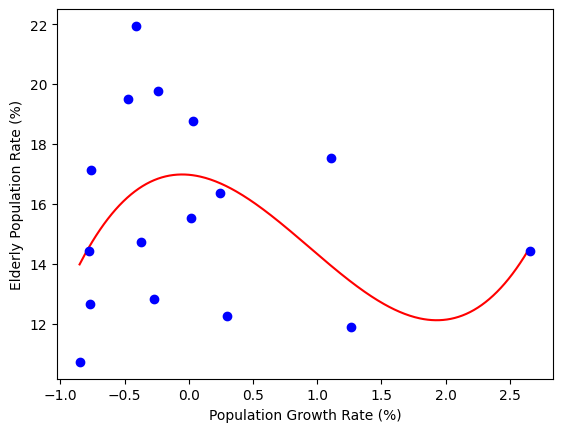

In [ ]:
X = np.array([0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66])
Y = np.array([12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42])

# a, b를 랜덤으로 정하기
a = tf.Variable(rd.random())
b = tf.Variable(rd.random())
c = tf.Variable(rd.random())
d = tf.Variable(rd.random())

# MSE
def compute_loss():
  y_pred = a * X ** 3 + b * X ** 2 + c * X + d
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a, b, c, d])
  if i % 100 == 99:
    print(f'{i} a: {a.numpy()} b: {b.numpy()} c: {c.numpy()} d: {d.numpy()} loss: {compute_loss().numpy()}')

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x ** 3 + b * line_x ** 2 + c * line_x + d

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 딥러닝을 이용한 회귀
- 3장에서 만든 모델 비스무리하게 만들기
- 이번엔 활성화함수로 tanh 사용

In [ ]:
X = np.array([0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66])
Y = np.array([12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1/1 [==============================] - 0s 482ms/step - loss: 256.7131
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 109.2865
Epoch 3/20
1/1 [==============================] - 0s 10ms/step - loss: 10.1514
Epoch 4/20
1/1 [==============================] - 0s 10ms/step - loss: 9.8187
Epoch 5/20
1/1 [==============================] - 0s 9ms/step - loss: 9.7856
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 9.7574
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 9.7319
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 9.7085
Epoch 9/20
1/1 [==============================] - 0s 11ms/step - loss: 9.6865
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 9.6654
Epoch 11/20
1/1 [==============================] - 0s 9ms/step - loss: 9.6448
Epoch 12/20
1/1 [==============================] - 0s 7ms/step - loss: 9.6241
Epoch 13/20
1/1 [==============================] - 0s 12ms/s

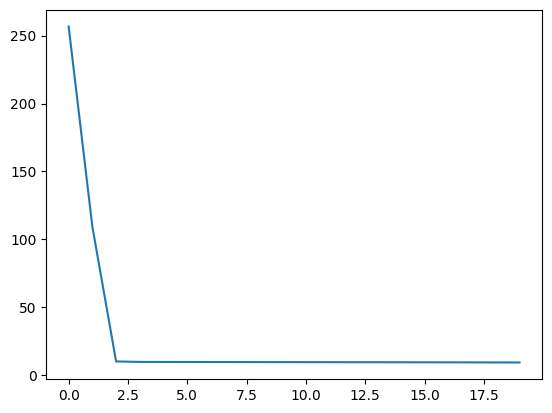

In [ ]:
history = model.fit(X, Y, epochs=20)
print(model.predict(X))
plt.plot(history.history['loss'])

2/2 [==============================] - 0s 4ms/step


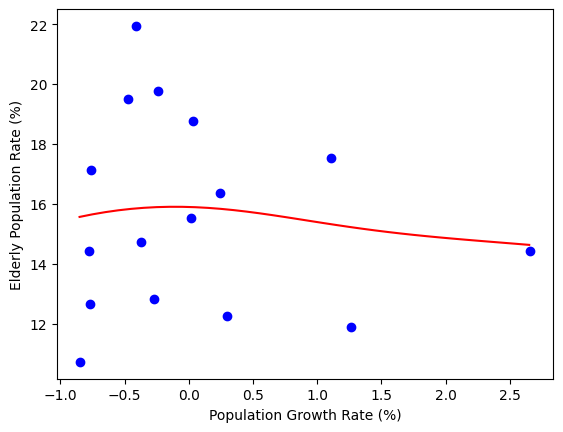

In [ ]:
line_x = np.arange(min(X), max(X), 0.1)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [ ]:
model.predict([1])

1/1 [==============================] - 0s 65ms/step


array([[15.389677]], dtype=float32)

## 보스턴 주택 가격 데이터셋과 회귀
- tensorflow에서 제공하는 데이터셋

데이터
- 훈련(train), 검증(validation), 평가(test)로 구분
- 검증 데이터는 훈련에서 떼옴
- 비율은 대략 60:20:20이며, 경우에 따라 달라짐
- 매개변수 갱신은 오직 훈련 데이터에서만

In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(train_X, train_Y, test_X, test_Y, sep='\n\n')
print(type(train_X))

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 4

정규화(Standardization)
- 데이터를 다음 식에 따라 옮김
- $z=\frac{x - m}{\sigma}$
- 주의! **훈련 데이터의 분포만을 기준으로 정규화를 해야함**(테스트 데이터, 검증 데이터는 없는 것처럼 취급하여 평균, 표준편차를 산출)
- cf) axis=0: 행을 대상으로(rows)

In [ ]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)

train_X = (train_X - x_mean) / x_std
test_X = (test_X - x_mean) / x_std
train_Y = (train_Y - y_mean) / y_std
test_Y = (test_Y - y_mean) / y_std

전과 비슷하게 모델 만들기
- cf) validation_split: 얼만큼의 비율을 검증 데이터로 쓸거냐
- cf) model.evaluate(x, y): x, y로 테스트하기
  - model.predict와 다른 점: predict는 값을 계산, evaluate는 손실함수를 계산

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.07), loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 52)                728       
                                                                 
 dense_25 (Dense)            (None, 39)                2067      
                                                                 
 dense_26 (Dense)            (None, 26)                1040      
                                                                 
 dense_27 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 17ms/step - loss: 3.0370 - val_loss: 0.9548
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.5769 - val_loss: 0.7698
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3917 - val_loss: 0.4609
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2688 - val_loss: 0.4932
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3259 - val_loss: 0.5357
Epoch 6/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3811 - val_loss: 0.4691
Epoch 7/25
10/10 [==============================] - 0s 7ms/step - loss: 0.3002 - val_loss: 0.3308
Epoch 8/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2895 - val_loss: 0.2265
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2644 - val_loss: 0.2513
Epoch 10/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1982 - val_loss: 0.2264
Epoch 11/25
10/10 

loss(훈련 데이터에서의 오차 정도), val_loss(검증 데이터에서의 오차 정도)

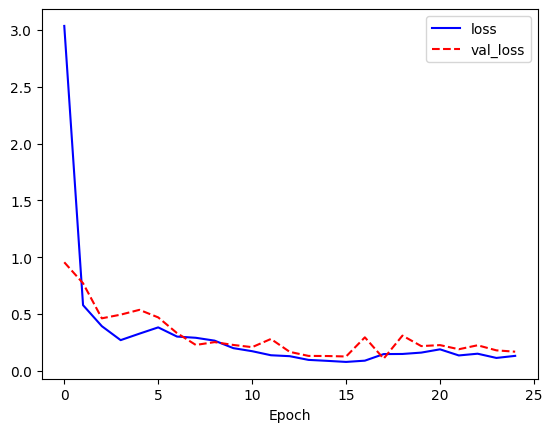

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

시험 데이터에 대한 손실함수

In [ ]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2604


0.260402649641037

실제 가격과 예상 가격의 비교
- $y=x$ 위에 있다면 잘 들어맞는 것임

4/4 [==============================] - 0s 4ms/step


Text(0, 0.5, 'pred_Y')

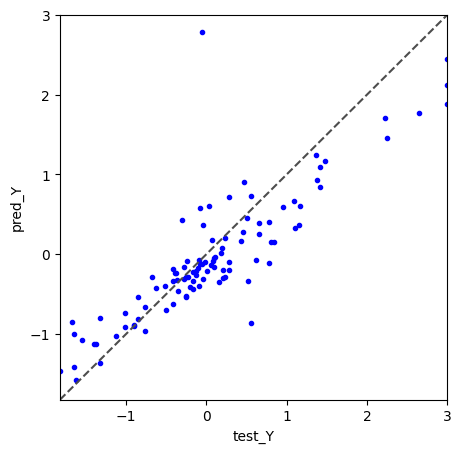

In [ ]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], linestyle='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

## Early Stopping을 이용한 오버피팅 방지
- 훈련, 시험 데이터(정규화 포함), 모델(컴파일 전)은 전 장의 것을 그대로 사용
- model.fit의 callbacks: 학습 중 실행할 함수
- tf.keras.callbacks.EarlyStopping: 일정 기준에서 조기 종료 -> 오버피팅 방지 가능
- parience 에포크 연속으로 monitor가 최고 기록을 갱신하지 못하면 조기 종료

In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)

train_X = (train_X - x_mean) / x_std
test_X = (test_X - x_mean) / x_std
train_Y = (train_Y - y_mean) / y_std
test_Y = (test_Y - y_mean) / y_std

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.07), loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 52)                728       
                                                                 
 dense_13 (Dense)            (None, 39)                2067      
                                                                 
 dense_14 (Dense)            (None, 26)                1040      
                                                                 
 dense_15 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 위에서 다 했던 부분이고, 딱 이것만 바뀜! callbacks 인자에 주목
history =  model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 2s 18ms/step - loss: 1.3349 - val_loss: 0.6358
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4172 - val_loss: 0.5885
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.5294 - val_loss: 0.4841
Epoch 4/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2644 - val_loss: 0.2325
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2024 - val_loss: 0.2739
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1864 - val_loss: 0.3423
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1808 - val_loss: 0.1815
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2093 - val_loss: 0.1961
Epoch 9/25
10/10 [==============================] - 0s 8ms/step - loss: 0.1458 - val_loss: 0.2678
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1882 - val_loss: 0.1827


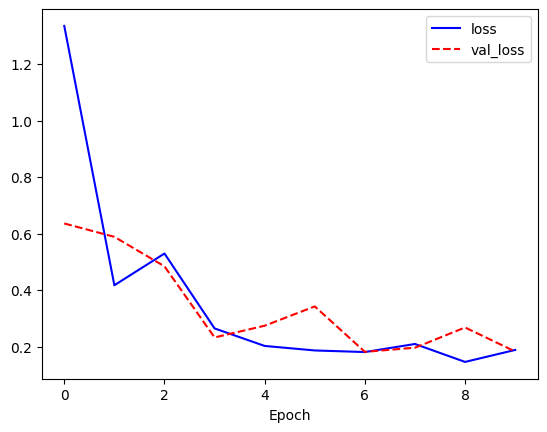

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2460


0.24596023559570312

4/4 [==============================] - 0s 2ms/step


Text(0, 0.5, 'pred_Y')

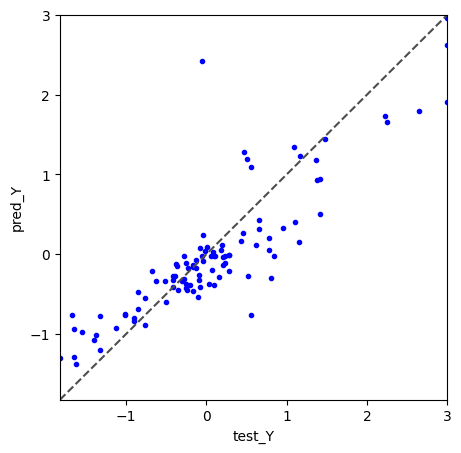

In [ ]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], linestyle='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

# cf) 콜라츠 추측 증명

In [ ]:
count = int(input())
lst = [0] + [0] * count

def doit(n):
  if n & 1:
    return n * 3 + 1
  else:
    return n >> 1

lst[1] = 1
for i in range(2, count + 1):
  num = i
  while lst[num] == 0:
    lst[num] = i
    num = doit(num)
    if num >= len(lst) - 1:
      lst.extend([0] * (num - len(lst) + 1))
  if lst[num] == i:
    print(f'{i} fail')
    
print('end')

66
end


100
100
50
25
76
38
19
58
29
88
44
22
11
34
17
52
26
13
40
20
10
5
16
8
4
2
1


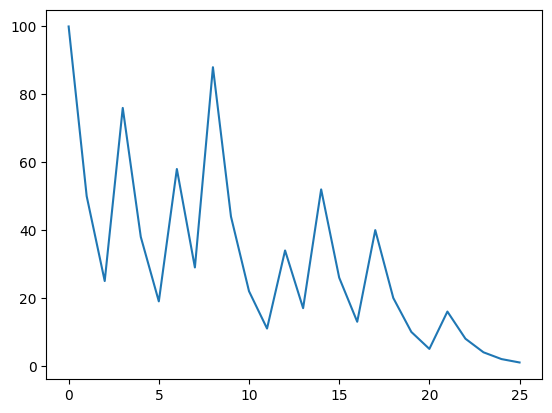

In [ ]:
import matplotlib.pyplot as plt

def collatz(n):
  """collatz 규칙에 따라 시행
  변화하는 값들을 리스트에 저장
  시작 값(int)을 입력받음
  변화하는 값들(list(int)), 콜라츠 추측이 성립하는가(bool)를 반환
  """
  lst = []
  now = n
  while now != 1:
    lst.append(now)
    now = _part(now)
    if now in lst:
      lst.append(now)
      return lst, False
  lst.append(1)
  return lst, True

def _part(n):
  """자연수(int)를 입력받으면 규칙에 따라 1회 실행"""
  if n & 1:
    return n * 3 + 1
  else:
    return n >> 1

if __name__ == "__main__":

  num = int(input())
  change, is_match = collatz(num)

  for i in change:
    print(i)

  if not is_match:
    print(f'콜라츠 추측에 안 맞음')

  plt.plot(change)
  plt.show()

# 5장 분류(Classification)
- cee & softmax function
- 어느 범주(category)에 속하는가
- 지도학습과 비지도학습(supervised learning/unsupervised learning)
- 이전의 회귀에서 쓴 것도 지도학습
- 본 장에서는 답이 있는 지도학습만 다룸

## 이항분류; 와인 데이터 가공(5장에서 계속 사용)
- 두 가지의 범주(category)로 분류

In [ ]:
# sep: 구분자
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# 두 데이터를 합치기 전, 색을 알려주는 정보를 추가
red['type'] = 0
white['type'] = 1
print(red.head())
print(white.head())

# 두 데이터를 합침
wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2 

지나치게 데이터 양이 적다면 테스트 데이터를 분리할 때 안 들어갈 수도 있어서 데이터를 증폭하는 등의 조치를 해야 하지만, 3:1 정도는 그냥 해도 무방함

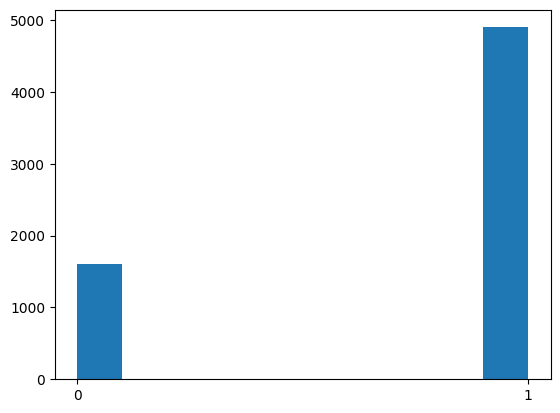

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
# 히스토그램을 그림
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

# wine의 type의 value를 count해 정리
print(wine['type'].value_counts())

정규화 전, 외부 데이터의 속성 확인



In [ ]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


정규화(Normalization)를 시행
- 지난번에 한 정규화(Standardization)와 다름
- 0...1 사이로 맞추는 거는 동일하나, 정규분포 형태로 맞추는 게 아님
- Standardization을 '표준화'로 번역하기도
- cf) 정규화 vs 표준화
  - 정규화: [0, 1] 범위를 벗어나면 안됨, 분포 모름
  - 표준화: 범위 무관, 정규분포에 근사

In [ ]:
# (Dataframe 객체).min -> 각 행별 최솟값
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [ ]:
# frac: 뽑는 비율
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2637       0.404959          0.153333     0.439759        0.210890   0.058140   
1181       0.305785          0.226667     0.271084        0.130368   0.033223   
2555       0.206612          0.033333     0.253012        0.007669   0.056478   
1804       0.314050          0.146667     0.132530        0.147239   0.066445   
540        0.239669          0.153333     0.186747        0.142638   0.051495   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2637             0.090278              0.426267  0.251012  0.186047   
1181             0.065972              0.274194  0.171390  0.310078   
2555             0.215278              0.322581  0.068440  0.317829   
1804             0.194444              0.426267  0.182957  0.279070   
540              0.031250              0.389401  0.157895  0.573643   

      sulphates   alcohol   quality  type  
2637   0.370787  0.101449  0.333333   1.0 

## 딥러닝을 통한 문제 해결
- tf.keras.utils.to_categorical: 정답 행렬을 one-hot encoding으로 바꿈
  - num_classes: 정답 범주의 개수

In [ ]:
train_idx = int(len(wine_np) * 0.8)
train_x, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_x, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)
print(train_y[:5])
print(test_y[:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


mertics: 추가적인 정보? accuracy는 정확도를 의미

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 48)                624       
                                                                 
 dense_15 (Dense)            (None, 24)                1176      
                                                                 
 dense_16 (Dense)            (None, 12)                300       
                                                                 
 dense_17 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 2s 6ms/step - loss: 0.1881 - accuracy: 0.9212 - val_loss: 0.0472 - val_accuracy: 0.9915
Epoch 2/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0373 - val_accuracy: 0.9900
Epoch 3/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0641 - accuracy: 0.9810 - val_loss: 0.0700 - val_accuracy: 0.9800
Epoch 4/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0472 - accuracy: 0.9874 - val_loss: 0.0304 - val_accuracy: 0.9923
Epoch 5/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0419 - accuracy: 0.9895 - val_loss: 0.0303 - val_accuracy: 0.9931
Epoch 6/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0388 - accuracy: 0.9892 - val_loss: 0.0307 - val_accuracy: 0.9938
Epoch 7/25
122/122 [==============================] - 1s 4ms/step - loss: 0.0532 - accuracy: 0.9841 - val_loss: 0.0374 - val_accuracy: 0.9915
Epoch 

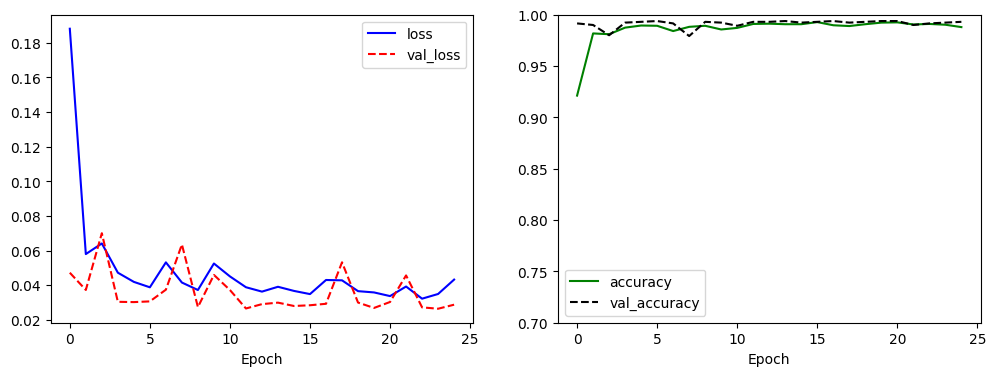

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

## 다항분류
- 범주가 여러 개 -> 와인 데이터에서는 3-9까지의 품질 정보를 보관

In [ ]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


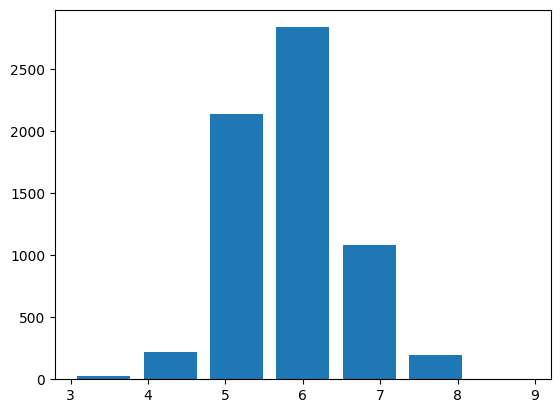

In [ ]:
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

했던 짓 반복...

In [ ]:
# quality 분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_x, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_x, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_y = tf.keras.utils.to_categorical(train_y, num_classes=3)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=3)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 2s 6ms/step - loss: 0.4934 - accuracy: 0.7934 - val_loss: 0.4468 - val_accuracy: 0.7831
Epoch 2/25
122/122 [==============================] - 1s 4ms/step - loss: 0.4144 - accuracy: 0.8047 - val_loss: 0.4399 - val_accuracy: 0.7931
Epoch 3/25
122/122 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8065 - val_loss: 0.4351 - val_accuracy: 0.7831
Epoch 4/25
122/122 [==============================] - 1s 5ms/step - loss: 0.4005 - accuracy: 0.8099 - val_loss: 0.4400 - val_accuracy: 0.7831
Epoch 5/25
122/122 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8109 - val_loss: 0.4380 - val_accuracy: 0.7831
Epoch 6/25
122/122 [==============================] - 1s 5ms/step - loss: 0.3996 - accuracy: 0.8024 - val_loss: 0.4730 - val_accuracy: 0.7831
Epoch 7/25
122/122 [==============================] - 1s 5ms/step - loss: 0.4019 - accuracy: 0.8091 - val_loss: 0.4491 - val_accuracy: 0.7800
Epoch 

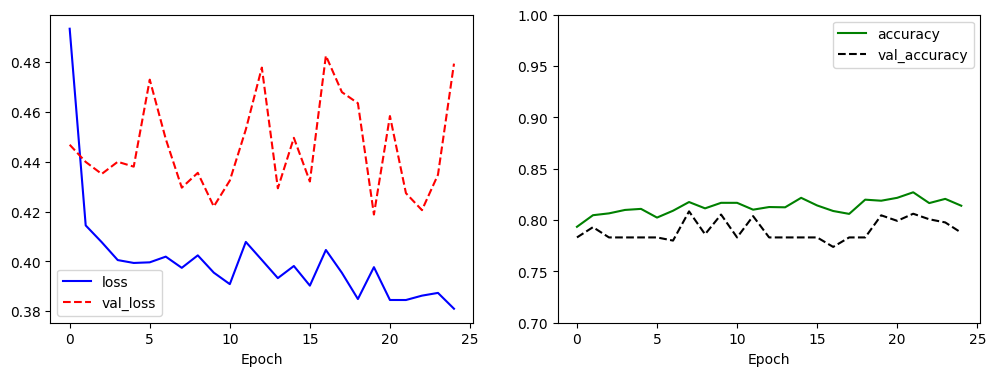

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

## Fashion MNIST 문제
- MNIST: 손글씨로 된 수를 판단하는 문제를 제공
- 옷을 판별하는 문제로 업그레이드 -> Fashion MNIST

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

print(len(train_x), len(train_y))

60000 60000


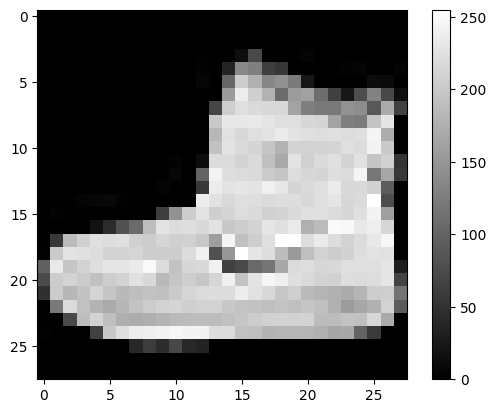

9


In [ ]:
plt.imshow(train_x[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_y[0])

In [ ]:
# 0-255 범위의 픽셀값을 가짐
train_x = train_x / 255.0
test_x = test_x / 255.0

print(train_x[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

- tf.keras.layers.Flatten: 2차원 배열을 일렬로 펼쳐줌
- loss='sparse_categorical_crossentropy': sparse는 별도의 전처리 없이 희소행렬로 정답을 나타내는 데이터를 정답 행렬로 사용 가능

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Adam의 기본 lr=0.001
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25, batch_size=32)

Epoch 1/25
1407/1407 [==============================] - 7s 4ms/step - loss: 0.5248 - accuracy: 0.8171 - val_loss: 0.4602 - val_accuracy: 0.8390
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3933 - accuracy: 0.8587 - val_loss: 0.3833 - val_accuracy: 0.8588
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3485 - accuracy: 0.8730 - val_loss: 0.3900 - val_accuracy: 0.8574
Epoch 4/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3234 - accuracy: 0.8821 - val_loss: 0.3514 - val_accuracy: 0.8718
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3021 - accuracy: 0.8895 - val_loss: 0.3503 - val_accuracy: 0.8741
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.8938 - val_loss: 0.3501 - val_accuracy: 0.8733
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2751 - accuracy: 0.8976 - val_loss: 0.3381 - val_accuracy:

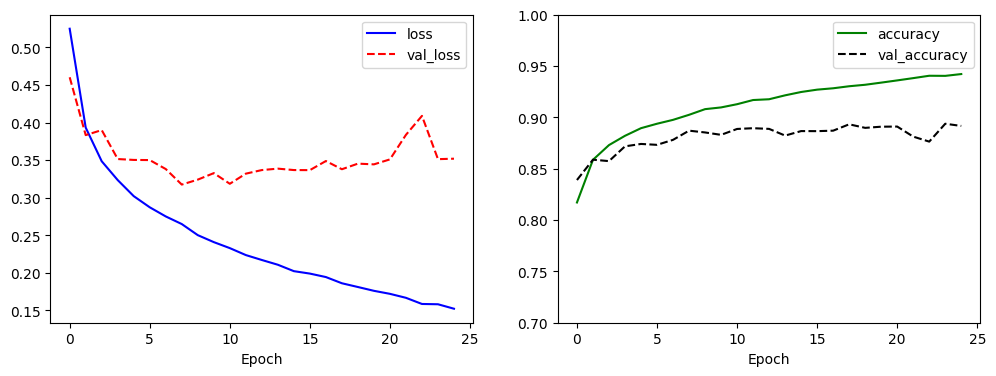

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3908 - accuracy: 0.8892


[0.39083853363990784, 0.88919997215271]

## @ 과제 1
- MNIST 문제(숫자 인식 문제)를 검색해보기
- 위 코드를 참고하여 손글씨 숫자 인식을 하는 신경망을 제작해보기

**평가**

1. 데이터를 전처리할 것(정규화; Normalization)
2. 모델을 생성할 것
3. 모델을 실행할 것
4. 모델을 평가할 것
  - loss, val_loss, accuracy, val_accuracy를 그래프로 표현할 것
  - predict, evaluate로 test_x, test_y를 넣어 모델 평가하기
1. *(optional)* 현재 모델을 더욱 개선할 수 있는 방안을 생각해보기

In [3]:
mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print(len(train_x), len(test_x))

11490434/11490434 [==============================] - 2s 0us/step
60000 10000


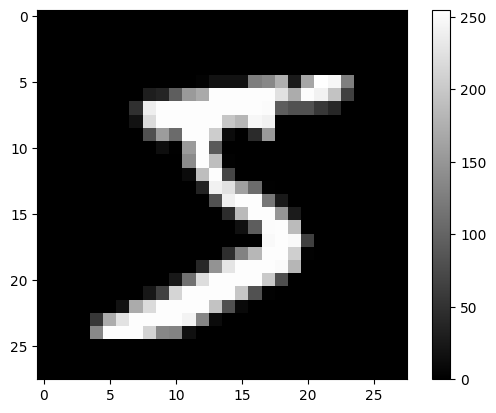

5


In [4]:
plt.imshow(train_x[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_y[0])